In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt   # matplotlib's plotting framework

In [2]:
train_filename_iq = ( './../datasets/dengue_test_iq.pkl' )
dengue_test_iq = pd.read_pickle( train_filename_iq )

test_filename_sj = ( './../datasets/dengue_test_sj.pkl' )
dengue_test_sj = pd.read_pickle( test_filename_sj )

submission_sj = pd.DataFrame( dengue_test_sj, columns = ['city'])
submission_iq = pd.DataFrame( dengue_test_iq, columns = ['city'])
submission_sj.reset_index( inplace = True)
submission_sj['year'] = submission_sj['week_start_date'].dt.year
submission_sj['weekofyear'] = submission_sj['week_start_date'].dt.weekofyear
submission_iq.reset_index( inplace = True)
submission_iq['year'] = submission_iq['week_start_date'].dt.year
submission_iq['weekofyear'] = submission_iq['week_start_date'].dt.weekofyear
submission = submission_sj.append( submission_iq )
submission.drop( columns = ['week_start_date'], inplace = True )
sub_sj = pd.DataFrame()
sub_iq = pd.DataFrame()
train_sj_for_graph = pd.DataFrame()
train_iq_for_graph = pd.DataFrame()

In [3]:
for month in range( 1, 13 ):
    train_filename = ( './../datasets/train_sj_month_' + str( month ) + '.pkl' )
    test_filename  = ( './../datasets/test_sj_month_' + str( month ) + '.pkl' )
    dengue_train_sj_month = pd.read_pickle( train_filename )
    dengue_test_sj_month  = pd.read_pickle( test_filename )
    X = pd.DataFrame( dengue_train_sj_month )
    X.drop( columns = ['city','year','total_cases','month'], inplace = True )
    y = dengue_train_sj_month.total_cases
    X_sj_Full_train, X_sj_Full_test, Y_sj_Full_train, Y_sj_Full_test = train_test_split(
                                                                    X, y, shuffle = False)
    param_grid = { 
        "n_estimators"      : [160,220,150],
        "max_features"      : ["sqrt"],
        "min_samples_split" : [10,12,18],
        "bootstrap"         : [True],
        "max_depth"         : [2,4,5,8]
        }
    estimator = RandomForestRegressor( criterion='mae', oob_score=True)
    rf_est = GridSearchCV(estimator, param_grid,
                          n_jobs=-1, cv=5, verbose=0,
                          iid=True ).fit( X_sj_Full_train, Y_sj_Full_train)
    Y_sj_test_pred = rf_est.best_estimator_.predict(X_sj_Full_test).astype(int)
    print ("San Juan Test  MAE error :", mean_absolute_error(Y_sj_test_pred, Y_sj_Full_test))
    Y_sj_train_pred = rf_est.best_estimator_.predict(X_sj_Full_train).astype(int)
    print ("San Juan Train MAE error :", mean_absolute_error(Y_sj_train_pred, Y_sj_Full_train))
    X_test = pd.DataFrame( dengue_test_sj_month, columns = X.columns )
    submit_pred_sj = pd.DataFrame( dengue_test_sj_month, columns = ['city','week_start_date'])
    submit_pred_sj['total_cases'] = rf_est.best_estimator_.predict(X_test).astype( 'int')
    sub_sj = sub_sj.append( submit_pred_sj, sort = False )
    train_sj_train_pred_actual = pd.DataFrame( X_sj_Full_train, columns = ['city','week_start_date'] )
    train_sj_train_pred_actual['total_cases'] = Y_sj_Full_train
    train_sj_train_pred_actual['pred'] = Y_sj_train_pred
    train_sj_test_pred_actual = pd.DataFrame( X_sj_Full_test, columns = ['city','week_start_date'] )
    train_sj_test_pred_actual['total_cases'] = Y_sj_Full_test
    train_sj_test_pred_actual['pred'] = Y_sj_test_pred
    train_sj_for_graph = train_sj_for_graph.append( train_sj_train_pred_actual, sort = False )
    train_sj_for_graph = train_sj_for_graph.append( train_sj_test_pred_actual, sort = False )
sub_sj = sub_sj.drop( columns=['week_start_date'])
sub_sj.reset_index( inplace = True )
sub_sj['year'] = sub_sj['week_start_date'].dt.year
sub_sj['weekofyear'] = sub_sj['week_start_date'].dt.weekofyear
sub_sj.drop( columns = ['week_start_date'], inplace = True )

San Juan Test  MAE error : 17.304347826086957
San Juan Train MAE error : 12.656716417910447
San Juan Test  MAE error : 12.833333333333334
San Juan Train MAE error : 8.722222222222221
San Juan Test  MAE error : 8.055555555555555
San Juan Train MAE error : 6.444444444444445
San Juan Test  MAE error : 6.608695652173913
San Juan Train MAE error : 4.96969696969697
San Juan Test  MAE error : 7.722222222222222
San Juan Train MAE error : 5.153846153846154
San Juan Test  MAE error : 12.555555555555555
San Juan Train MAE error : 7.296296296296297
San Juan Test  MAE error : 34.30434782608695
San Juan Train MAE error : 14.761194029850746
San Juan Test  MAE error : 32.611111111111114
San Juan Train MAE error : 23.574074074074073
San Juan Test  MAE error : 38.78947368421053
San Juan Train MAE error : 21.736842105263158
San Juan Test  MAE error : 32.09090909090909
San Juan Train MAE error : 27.296875
San Juan Test  MAE error : 33.833333333333336
San Juan Train MAE error : 25.685185185185187
San Juan 

In [4]:
for month in range( 1, 13 ):
    train_filename = ( './../datasets/train_iq_month_' + str( month ) + '.pkl' )
    test_filename  = ( './../datasets/test_iq_month_' + str( month ) + '.pkl' )
    dengue_train_iq_month = pd.read_pickle( train_filename )
    dengue_test_iq_month  = pd.read_pickle( test_filename )
    X = pd.DataFrame( dengue_train_iq_month )
    X.drop( columns = ['city','year','total_cases','month'], inplace = True )
    y = dengue_train_iq_month.total_cases
    X_iq_train, X_iq_test, Y_iq_train, Y_iq_test = train_test_split( X, y, shuffle = False)
    param_grid = { 
        "n_estimators"      : [160,220,100],
        "max_features"      : ["sqrt"],
        "min_samples_split" : [10,16,20],
        "bootstrap"         : [True],
        "max_depth"         : [2,4,5,8]
        }
    estimator = RandomForestRegressor( criterion='mae', oob_score=True)
    rf_est = GridSearchCV(estimator, param_grid,
                          n_jobs=-1, cv=5, verbose=0, iid=True).fit( X_iq_train, Y_iq_train )
    Y_iq_pred = rf_est.best_estimator_.predict(X_iq_test).astype(int)
    print ("Iquitos Test  MAE error :", mean_absolute_error(Y_iq_pred, Y_iq_test))
    pred_train_iq = rf_est.best_estimator_.predict(X_iq_train).astype(int)
    print ("Iquitos Train MAE error :", mean_absolute_error(pred_train_iq, Y_iq_train))
    X_test = pd.DataFrame( dengue_test_iq_month, columns = X.columns )
    submit_pred_iq = pd.DataFrame( dengue_test_iq_month, columns = ['city', 'week_start_date'])
    submit_pred_iq['total_cases'] = rf_est.best_estimator_.predict(X_test).astype( 'int')
    sub_iq = sub_iq.append( submit_pred_iq, sort = False )
    train_iq_train_pred_actual = pd.DataFrame( X_iq_train, columns = ['city','week_start_date'] )
    train_iq_train_pred_actual['total_cases'] = Y_iq_train
    train_iq_train_pred_actual['pred'] = pred_train_iq
    train_iq_test_pred_actual = pd.DataFrame( X_iq_test, columns = ['city','week_start_date'] )
    train_iq_test_pred_actual['total_cases'] = Y_iq_test
    train_iq_test_pred_actual['pred'] = Y_iq_pred
    train_iq_for_graph = train_iq_for_graph.append( train_iq_train_pred_actual, sort = False )
    train_iq_for_graph = train_iq_for_graph.append( train_iq_test_pred_actual, sort = False )
sub_iq.drop( columns=['week_start_date'], inplace = True)
sub_iq.reset_index( inplace = True )
sub_iq['year'] = sub_iq['week_start_date'].dt.year
sub_iq['weekofyear'] = sub_iq['week_start_date'].dt.weekofyear
sub_iq.drop( columns = ['week_start_date'], inplace = True )

Iquitos Test  MAE error : 11.846153846153847
Iquitos Train MAE error : 5.351351351351352
Iquitos Test  MAE error : 11.7
Iquitos Train MAE error : 6.566666666666666
Iquitos Test  MAE error : 4.0
Iquitos Train MAE error : 3.8666666666666667
Iquitos Test  MAE error : 2.3846153846153846
Iquitos Train MAE error : 2.4054054054054053
Iquitos Test  MAE error : 2.5
Iquitos Train MAE error : 2.433333333333333
Iquitos Test  MAE error : 1.6
Iquitos Train MAE error : 2.3
Iquitos Test  MAE error : 2.0
Iquitos Train MAE error : 1.588235294117647
Iquitos Test  MAE error : 2.5
Iquitos Train MAE error : 1.2
Iquitos Test  MAE error : 10.727272727272727
Iquitos Train MAE error : 3.375
Iquitos Test  MAE error : 18.0
Iquitos Train MAE error : 3.942857142857143
Iquitos Test  MAE error : 6.6
Iquitos Train MAE error : 3.1666666666666665
Iquitos Test  MAE error : 5.3
Iquitos Train MAE error : 10.966666666666667


In [5]:
train_sj_for_graph.drop( columns=['week_start_date'], inplace = True)
train_sj_for_graph.reset_index( inplace = True )
train_sj_for_graph['city'] = 'sj'
train_iq_for_graph.drop( columns=['week_start_date'], inplace = True)
train_iq_for_graph.reset_index( inplace = True )
train_iq_for_graph['city'] = 'iq'

train_data_for_graph = train_sj_for_graph.append( train_iq_for_graph, sort = True )
train_data_for_graph = train_data_for_graph.sort_values(by='week_start_date')

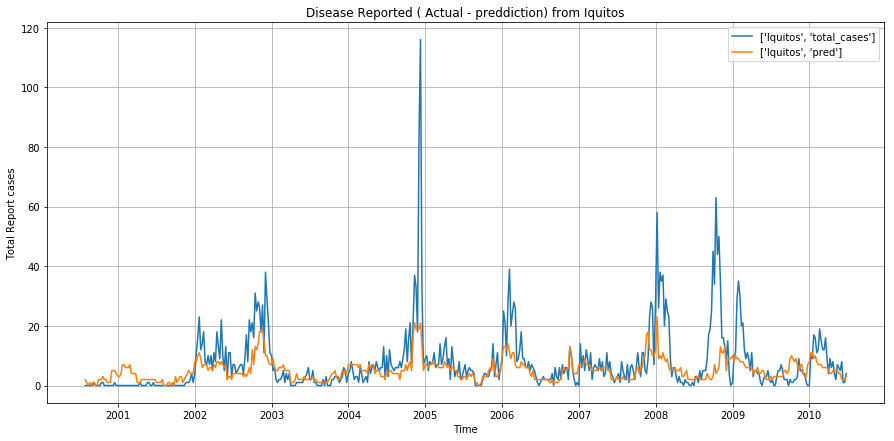

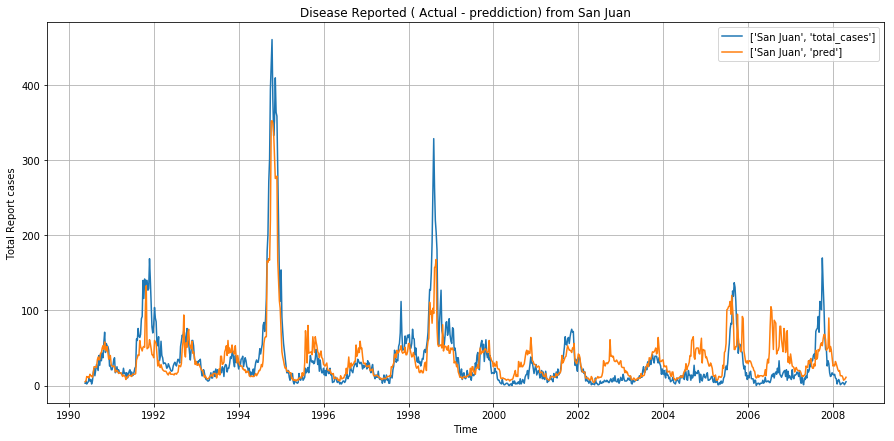

In [8]:
for city_name in ['iq', 'sj']:
    plt.figure( figsize=( 15, 7 ))
    data = train_data_for_graph[train_data_for_graph['city'] == city_name ]
    plt.xlabel('Time')
    plt.ylabel('Total Report cases')
    city_name = "Iquitos" if city_name == 'iq' else "San Juan"        # sj for San Juan and iq for Iquitos
    plt.plot(data.week_start_date,data['total_cases'], label=[city_name,'total_cases'])
    plt.plot(data.week_start_date,data['pred'], label=[city_name, 'pred'])
    title = 'Disease Reported ( Actual - preddiction) from ' + city_name
    plt.title( title ) 
    plt.grid()
    plt.legend()
    filename = title + '.png'
    plt.savefig( filename )
    plt.show()

In [9]:
submit = sub_sj.append( sub_iq, sort=True )

In [10]:
submission_RF = pd.merge( submission, submit, on=['city','year','weekofyear'], how='left' )

In [11]:
submission_RF.columns = ['city','year','weekofyear','total_cases']
submission_RF.to_excel("data/submission_month_RF.xlsx", index = False)

In [12]:
submission_RF.to_csv("data/submission_month_RF.csv", index = False)

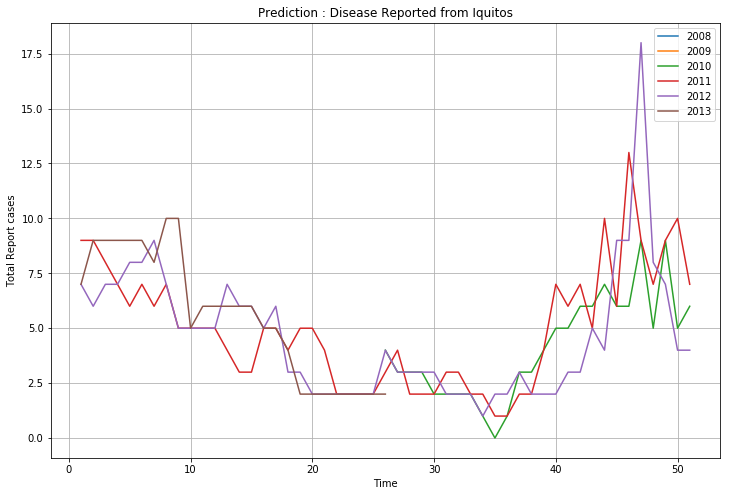

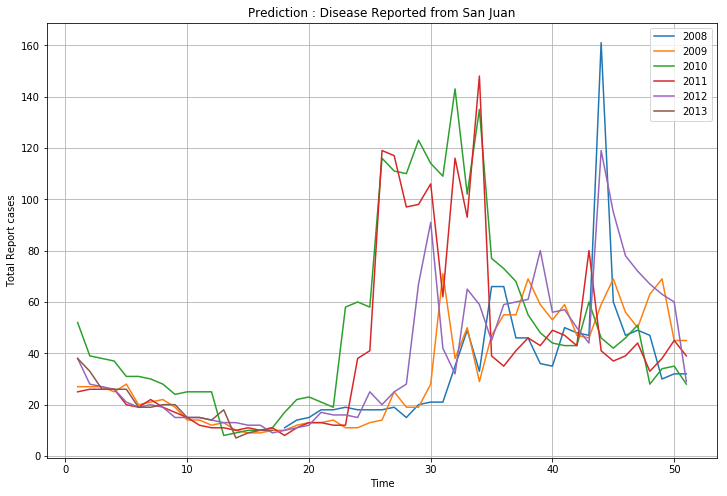

In [13]:
for city_name in ['iq', 'sj']:
    plt.figure( figsize=( 12, 8 ))
    data = submission_RF[submission_RF['city'] == city_name ]
    plt.xlabel('Time')
    plt.ylabel('Total Report cases')
    city_name = "Iquitos" if city_name == 'iq' else "San Juan"        # sj for San Juan and iq for Iquitos
    for year in submission_RF['year'].unique():
        yearwiseData = pd.DataFrame(data[(data['year'] == year) & (data['weekofyear'] < 52)], columns = ['weekofyear','total_cases'])
        plt.plot( yearwiseData.weekofyear,yearwiseData['total_cases'], label=year)
    title = 'Prediction : Disease Reported from ' + city_name
    plt.grid()
    plt.legend()

    plt.title( title )
    filename = title + '.png'
    plt.savefig( filename )
    plt.show()
